# Fraud Analysis in E-Commerce Indonesia Using Machine Learning

### Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Import table

In [2]:
# Transaction Data in e-commerce
a=pd.read_csv('C:/Users/ACER/Desktop/Matematika/Semester 6/Metode Penelitian/UTS/Fraud Data.csv')
a

user_id     purchase_time signup_time_buyer signup_time_seller  \
0            1  07/01/2020 16.46  07/01/2020 16.39   12/06/2014 13.44   
1            2  06/02/2020 18.23  06/02/2020 18.16   12/06/2014 13.44   
2            3  26/01/2020 15.49  26/01/2020 14.28   12/06/2014 13.44   
3            4  25/01/2020 20.43  23/01/2020 14.16   12/06/2014 13.44   
4            5  14/02/2020 12.00  12/02/2020 13.23   12/06/2014 13.44   
...        ...               ...               ...                ...   
59095    59096  09/02/2020 00.44  08/02/2020 22.45   07/02/2020 16.20   
59096    59097  06/03/2020 21.48  06/03/2020 20.58   16/08/2018 19.05   
59097    59098  23/02/2020 16.23  23/02/2020 15.53   06/11/2019 22.19   
59098    59099  14/01/2020 12.00  13/01/2020 11.19   22/05/2018 20.59   
59099    59100  21/01/2020 16.32  31/01/2018 13.56   15/01/2020 14.41   

       seller_reputation_score device_type        payment_method  \
0                      2398102     Android       Uang Elektronik   
1                      2398102     Android       Uang Elektronik   
2                      2398102     Android       Uang Elektronik   
3                      2398102     Android       Uang Elektronik   
4                      2398102     Android       Uang Elektronik   
...                        ...         ...                   ...   
59095                        0     Android       Uang Elektronik   
59096                        0     Android       Uang Elektronik   
59097                        0     Android       Uang Elektronik   
59098                        0     Android  Virtual Account Bank   
59099                        0     Android  Virtual Account Bank   

       purchase_value  potential_benefit  class  
0               58750              26050      0  
1               90400              31408      0  
2               86500              31330      0  
3               72500              26300      0  
4               54500              19840      0  
...               ...                ...    ...  
59095           67000              31340      0  
59096           83000              30830      0  
59097           76000              31200      0  
59098          261100              30000      0  
59099          145600              30000      0  

[59100 rows x 10 columns]

## Pre Processing Data

In [3]:
# Check data type
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59100 entries, 0 to 59099
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  59100 non-null  int64 
 1   purchase_time            59100 non-null  object
 2   signup_time_buyer        59100 non-null  object
 3   signup_time_seller       59100 non-null  object
 4   seller_reputation_score  59100 non-null  int64 
 5   device_type              59100 non-null  object
 6   payment_method           59100 non-null  object
 7   purchase_value           59100 non-null  int64 
 8   potential_benefit        59100 non-null  int64 
 9   class                    59100 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.5+ MB


In [4]:
# Statistic Description
a.describe(include="all")

user_id     purchase_time signup_time_buyer signup_time_seller  \
count   59100.000000             59100             59100              59100   
unique           NaN             42706             42768              21115   
top              NaN  06/02/2020 22.44  05/02/2020 13.19   16/10/2018 13.44   
freq             NaN                 8                 8                714   
mean    29550.500000               NaN               NaN                NaN   
std     17060.844792               NaN               NaN                NaN   
min         1.000000               NaN               NaN                NaN   
25%     14775.750000               NaN               NaN                NaN   
50%     29550.500000               NaN               NaN                NaN   
75%     44325.250000               NaN               NaN                NaN   
max     59100.000000               NaN               NaN                NaN   

        seller_reputation_score device_type   payment_method  purchase_value  \
count              5.910000e+04       59100            59100    5.910000e+04   
unique                      NaN           2                5             NaN   
top                         NaN     Android  Uang Elektronik             NaN   
freq                        NaN       58987            48915             NaN   
mean               2.335564e+04         NaN              NaN    8.794994e+04   
std                7.917460e+04         NaN              NaN    2.245829e+05   
min                0.000000e+00         NaN              NaN    1.300000e+04   
25%                2.000000e+00         NaN              NaN    6.700000e+04   
50%                6.850000e+02         NaN              NaN    7.150000e+04   
75%                9.226000e+03         NaN              NaN    8.500000e+04   
max                2.398102e+06         NaN              NaN    2.378230e+07   

        potential_benefit         class  
count        59100.000000  59100.000000  
unique                NaN           NaN  
top                   NaN           NaN  
freq                  NaN           NaN  
mean         30229.171878      0.144010  
std           1966.858454      0.351103  
min          15000.000000      0.000000  
25%          30000.000000      0.000000  
50%          30690.000000      0.000000  
75%          31340.000000      0.000000  
max          40000.000000      1.000000

In [5]:
# Change data type class variable from integer to category
a["class"]=a["class"].astype("category")
a.dtypes

user_id                       int64
purchase_time                object
signup_time_buyer            object
signup_time_seller           object
seller_reputation_score       int64
device_type                  object
payment_method               object
purchase_value                int64
potential_benefit             int64
class                      category
dtype: object

In [6]:
# Change to date format for purchase time, signup time buyer, and signup time seller

a['purchase_time'] =  pd.to_datetime(a['purchase_time'], format="%d/%m/%Y %H.%M")

a['signup_time_buyer'] =  pd.to_datetime(a['signup_time_buyer'], format='%d/%m/%Y %H.%M')

a['signup_time_seller'] =  pd.to_datetime(a['signup_time_seller'], format='%d/%m/%Y %H.%M')

In [7]:
# Range Transaction
print(a["purchase_time"].min())
print(a["purchase_time"].max())

2020-01-05 04:45:00
2020-03-28 20:24:00


In [8]:
# Define dummy variable for device_type variable dan payment_method variable
b = pd.get_dummies(a, columns=['device_type','payment_method'])
b

user_id       purchase_time   signup_time_buyer  signup_time_seller  \
0            1 2020-01-07 16:46:00 2020-01-07 16:39:00 2014-06-12 13:44:00   
1            2 2020-02-06 18:23:00 2020-02-06 18:16:00 2014-06-12 13:44:00   
2            3 2020-01-26 15:49:00 2020-01-26 14:28:00 2014-06-12 13:44:00   
3            4 2020-01-25 20:43:00 2020-01-23 14:16:00 2014-06-12 13:44:00   
4            5 2020-02-14 12:00:00 2020-02-12 13:23:00 2014-06-12 13:44:00   
...        ...                 ...                 ...                 ...   
59095    59096 2020-02-09 00:44:00 2020-02-08 22:45:00 2020-02-07 16:20:00   
59096    59097 2020-03-06 21:48:00 2020-03-06 20:58:00 2018-08-16 19:05:00   
59097    59098 2020-02-23 16:23:00 2020-02-23 15:53:00 2019-11-06 22:19:00   
59098    59099 2020-01-14 12:00:00 2020-01-13 11:19:00 2018-05-22 20:59:00   
59099    59100 2020-01-21 16:32:00 2018-01-31 13:56:00 2020-01-15 14:41:00   

       seller_reputation_score  purchase_value  potential_benefit class  \
0                      2398102           58750              26050     0   
1                      2398102           90400              31408     0   
2                      2398102           86500              31330     0   
3                      2398102           72500              26300     0   
4                      2398102           54500              19840     0   
...                        ...             ...                ...   ...   
59095                        0           67000              31340     0   
59096                        0           83000              30830     0   
59097                        0           76000              31200     0   
59098                        0          261100              30000     0   
59099                        0          145600              30000     0   

       device_type_Android  device_type_iOS  payment_method_Credit Payment  \
0                        1                0                              0   
1                        1                0                              0   
2                        1                0                              0   
3                        1                0                              0   
4                        1                0                              0   
...                    ...              ...                            ...   
59095                    1                0                              0   
59096                    1                0                              0   
59097                    1                0                              0   
59098                    1                0                              0   
59099                    1                0                              0   

       payment_method_Internet Banking/M-Banking  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
59095                                          0   
59096                                          0   
59097                                          0   
59098                                          0   
59099                                          0   

       payment_method_Offline Store  payment_method_Uang Elektronik  \
0                                 0                               1   
1                                 0                               1   
2                                 0                               1   
3                                 0                               1   
4                                 0                               1   
...                             ...                             ...   
59095                             0                               1   
59096                             0    

In [9]:
# break down purchase time, signup time buyer, and signup time seller by day, month, year, hour, and minute
b['purchase_year'] = b['purchase_time'].dt.year
b['purchase_month'] = b['purchase_time'].dt.month
b['purchase_month'] = b['purchase_time'].dt.dayofweek
b['purchase_day'] = b['purchase_time'].dt.day
b['purchase_hour'] = b['purchase_time'].dt.hour
b['purchase_minute'] = b['purchase_time'].dt.minute

b['signup_year_buyer'] = b['signup_time_buyer'].dt.year
b['signup_month_buyer'] = b['signup_time_buyer'].dt.month
b['signup_month_buyer'] = b['signup_time_buyer'].dt.dayofweek
b['signup_day_buyer'] = b['signup_time_buyer'].dt.day
b['signup_hour_buyer'] = b['signup_time_buyer'].dt.hour
b['signup_minute_buyer'] = b['signup_time_buyer'].dt.minute

b['signup_year_seller'] = b['signup_time_seller'].dt.year
b['signup_month_seller'] = b['signup_time_seller'].dt.month
b['signup_month_seller'] = b['signup_time_seller'].dt.dayofweek
b['signup_day_seller'] = b['signup_time_seller'].dt.day
b['signup_hour_seller'] = b['signup_time_seller'].dt.hour
b['signup_minute_seller'] = b['signup_time_seller'].dt.minute

In [10]:
# Create a new variable, which is the difference between purchase time and signup time buyer 
b['time difference in days buyer']=(b['purchase_time']-b['signup_time_buyer']).dt.days

In [11]:
# Create a new variable, which is the difference between purchase time and signup time seller
b['time difference in days seller']=(b['purchase_time']-b['signup_time_seller']).dt.days

In [12]:
b

user_id       purchase_time   signup_time_buyer  signup_time_seller  \
0            1 2020-01-07 16:46:00 2020-01-07 16:39:00 2014-06-12 13:44:00   
1            2 2020-02-06 18:23:00 2020-02-06 18:16:00 2014-06-12 13:44:00   
2            3 2020-01-26 15:49:00 2020-01-26 14:28:00 2014-06-12 13:44:00   
3            4 2020-01-25 20:43:00 2020-01-23 14:16:00 2014-06-12 13:44:00   
4            5 2020-02-14 12:00:00 2020-02-12 13:23:00 2014-06-12 13:44:00   
...        ...                 ...                 ...                 ...   
59095    59096 2020-02-09 00:44:00 2020-02-08 22:45:00 2020-02-07 16:20:00   
59096    59097 2020-03-06 21:48:00 2020-03-06 20:58:00 2018-08-16 19:05:00   
59097    59098 2020-02-23 16:23:00 2020-02-23 15:53:00 2019-11-06 22:19:00   
59098    59099 2020-01-14 12:00:00 2020-01-13 11:19:00 2018-05-22 20:59:00   
59099    59100 2020-01-21 16:32:00 2018-01-31 13:56:00 2020-01-15 14:41:00   

       seller_reputation_score  purchase_value  potential_benefit class  \
0                      2398102           58750              26050     0   
1                      2398102           90400              31408     0   
2                      2398102           86500              31330     0   
3                      2398102           72500              26300     0   
4                      2398102           54500              19840     0   
...                        ...             ...                ...   ...   
59095                        0           67000              31340     0   
59096                        0           83000              30830     0   
59097                        0           76000              31200     0   
59098                        0          261100              30000     0   
59099                        0          145600              30000     0   

       device_type_Android  device_type_iOS  ...  signup_day_buyer  \
0                        1                0  ...                 7   
1                        1                0  ...                 6   
2                        1                0  ...                26   
3                        1                0  ...                23   
4                        1                0  ...                12   
...                    ...              ...  ...               ...   
59095                    1                0  ...                 8   
59096                    1                0  ...                 6   
59097                    1                0  ...                23   
59098                    1                0  ...                13   
59099                    1                0  ...                31   

       signup_hour_buyer  signup_minute_buyer  signup_year_seller  \
0                     16                   39                2014   
1                     18                   16                2014   
2                     14                   28                2014   
3                     14                   16                2014   
4                     13                   23                2014   
...                  ...                  ...                 ...   
59095                 22                   45                2020   
59096                 20                   58                2018   
59097                 15                   53                2019   
59098                 11                   19                2018   
59099                 13                   56                2020   

       signup_month_seller  signup_day_seller  signup_hour_seller  \
0                        3                 12                  13   
1                        3                 12                  13   
2                        3                 12                  13   
3                        3                 12                  13   
4                        3                 12                  13   
...                    ...                ...                 ...   
59095           

### Delete variables that are not used

In [13]:
# Delete user id and date
del b['user_id']
del b['purchase_time']
del b['signup_time_buyer']
del b['signup_time_seller']
b.dtypes

seller_reputation_score                         int64
purchase_value                                  int64
potential_benefit                               int64
class                                        category
device_type_Android                             uint8
device_type_iOS                                 uint8
payment_method_Credit Payment                   uint8
payment_method_Internet Banking/M-Banking       uint8
payment_method_Offline Store                    uint8
payment_method_Uang Elektronik                  uint8
payment_method_Virtual Account Bank             uint8
purchase_year                                   int64
purchase_month                                  int64
purchase_day                                    int64
purchase_hour                                   int64
purchase_minute                                 int64
signup_year_buyer                               int64
signup_month_buyer                              int64
signup_day_buyer            

### Split data set into data train and data test

In [14]:
# Define x and y variable
x=b.iloc[:,b.columns != 'class']
y=b['class']
display(x)
display(y)

seller_reputation_score  purchase_value  potential_benefit  \
0                      2398102           58750              26050   
1                      2398102           90400              31408   
2                      2398102           86500              31330   
3                      2398102           72500              26300   
4                      2398102           54500              19840   
...                        ...             ...                ...   
59095                        0           67000              31340   
59096                        0           83000              30830   
59097                        0           76000              31200   
59098                        0          261100              30000   
59099                        0          145600              30000   

       device_type_Android  device_type_iOS  payment_method_Credit Payment  \
0                        1                0                              0   
1                        1                0                              0   
2                        1                0                              0   
3                        1                0                              0   
4                        1                0                              0   
...                    ...              ...                            ...   
59095                    1                0                              0   
59096                    1                0                              0   
59097                    1                0                              0   
59098                    1                0                              0   
59099                    1                0                              0   

       payment_method_Internet Banking/M-Banking  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
59095                                          0   
59096                                          0   
59097                                          0   
59098                                          0   
59099                                          0   

       payment_method_Offline Store  payment_method_Uang Elektronik  \
0                                 0                               1   
1                                 0                               1   
2                                 0                               1   
3                                 0                               1   
4                                 0                               1   
...                             ...                             ...   
59095                             0                               1   
59096                             0                               1   
59097                             0                               1   
59098                             0                               0   
59099                             0                               0   

       payment_method_Virtual Account Bank  ...  signup_day_buyer  \
0                                        0  ...                 7   
1                                        0  ...                 6   
2                                        0  ...                26   
3                                        0  ...                23   
4                                        0  ...                12   
...                                    ...  ...               ...   
59095                                    0  ...                 8   
59096                                    0  ...                 6   
59097                                    0  ...                23   
59098                                    1  ...                13   
5909

0        0
1        0
2        0
3        0
4        0
        ..
59095    0
59096    0
59097    0
59098    0
59099    0
Name: class, Length: 59100, dtype: category
Categories (2, int64): [0, 1]

In [15]:
# Split x and y variable into data train and data test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41370, 27)
(17730, 27)
(41370,)
(17730,)


## Descriptive Variable

In [16]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

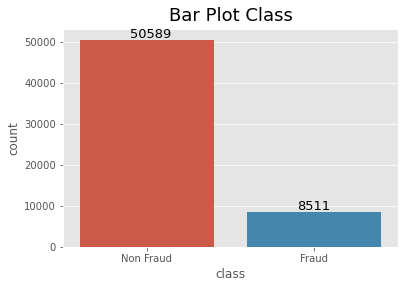

In [17]:
sns.countplot(x='class',data=b)
nonfraud = sum(1 for i in b['class'] if i == 0)
fraud = sum(1 for i in b['class'] if i == 1)
Class = [nonfraud, fraud]
for index, value in enumerate(Class):
    plt.text(index-0.1, value+500, str(value), fontsize=13)
plt.title("Bar Plot Class",fontsize=18,color="black",y=1.01)
plt.xticks([0,1],["Non Fraud","Fraud"])
plt.show()

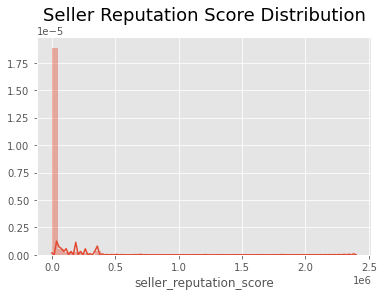

In [18]:
# Check distribution of seller reputation score
sns.distplot(b["seller_reputation_score"] )
plt.title("Seller Reputation Score Distribution",fontsize=18,color="black",y=1.05)
plt.show()

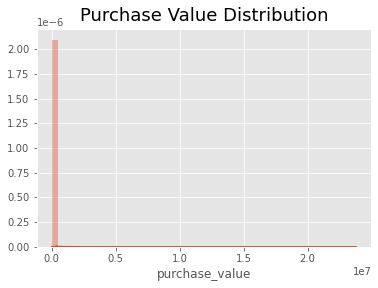

In [19]:
# Check distribution of purchase value
sns.distplot(b["purchase_value"] )
plt.title("Purchase Value Distribution",fontsize=18,color="black",y=1.01)
plt.show()

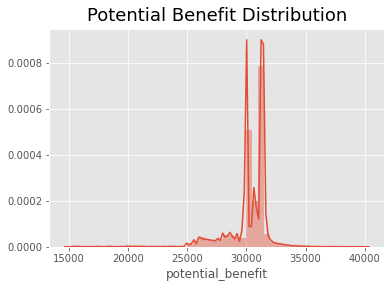

In [20]:
# Check distribution of potential benefit
sns.distplot(b["potential_benefit"] )
plt.title("Potential Benefit Distribution",fontsize=18,color="black",y=1.01)
plt.show()

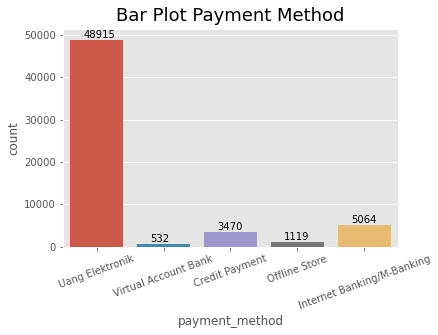

In [21]:
# Bar chart of payment method
sns.countplot(x='payment_method',data=a)
plt.xticks(rotation=20)
ue = sum(1 for i in a['payment_method'] if i == "Uang Elektronik")
vab = sum(1 for i in a['payment_method'] if i == "Virtual Account Bank")
cp = sum(1 for i in a['payment_method'] if i == "Credit Payment")
os = sum(1 for i in a['payment_method'] if i == "Offline Store")
ib = sum(1 for i in a['payment_method'] if i == "Internet Banking/M-Banking")
payment = [ue, vab, cp, os, ib]
for index, value in enumerate(payment):
    plt.text(index-0.2, value+500, str(value), fontsize=10)
plt.title("Bar Plot Payment Method",fontsize=18,color="black",y=1.01)
plt.show()

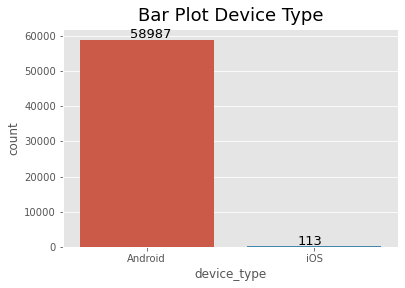

In [22]:
# Bar chart of device type
sns.countplot(x='device_type',data=a)
plt.title("Bar Plot Device Type",fontsize=18,color="black",y=1.01)
android = sum(1 for i in a['device_type'] if i == "Android")
ios = sum(1 for i in a['device_type'] if i == "iOS")
device = [android, ios]
for index, value in enumerate(device):
    plt.text(index-0.1, value+500, str(value), fontsize=13)
plt.show()

# Data Analysis

## Decision Tree Model

In [23]:
# Check the effect of variables in determining class
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=50).fit(x_train,y_train)

importances = pd.DataFrame({'feature (decision tree)':x_train.columns,'importance':np.round(dt.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)
importances.index = [x for x in range(1, len(importances.values)+1)]
importances

feature (decision tree)  importance
1                              purchase_value     0.19198
2                         signup_minute_buyer     0.12132
3                             purchase_minute     0.11388
4                        signup_minute_seller     0.10423
5                          signup_hour_seller     0.05861
6                               purchase_hour     0.05213
7              time difference in days seller     0.05018
8                     seller_reputation_score     0.04892
9                           signup_hour_buyer     0.04495
10                          signup_day_seller     0.03728
11                          potential_benefit     0.03640
12                           signup_day_buyer     0.03435
13                               purchase_day     0.02508
14                         signup_month_buyer     0.02435
15                             purchase_month     0.01944
16                        signup_month_seller     0.01757
17              time difference in days buyer     0.01363
18                         signup_year_seller     0.00285
19        payment_method_Virtual Account Bank     0.00102
20                          signup_year_buyer     0.00060
21              payment_method_Credit Payment     0.00049
22  payment_method_Internet Banking/M-Banking     0.00033
23               payment_method_Offline Store     0.00023
24             payment_method_Uang Elektronik     0.00018
25                            device_type_iOS     0.00000
26                              purchase_year     0.00000
27                        device_type_Android     0.00000

In [24]:
# Max Depth from none to 6
print('Model Accuracy Rate\n')
dt = DecisionTreeClassifier(max_depth=1,random_state=50).fit(x_train,y_train)
print('Max Depth 1')
print(dt.score(x_test,y_test))

dt = DecisionTreeClassifier(max_depth=2,random_state=50).fit(x_train,y_train)
print('Max Depth 2')
print(dt.score(x_test,y_test))

dt = DecisionTreeClassifier(max_depth=3,random_state=50).fit(x_train,y_train)
print('Max Depth 3')
print(dt.score(x_test,y_test))

dt = DecisionTreeClassifier(max_depth=4,random_state=50).fit(x_train,y_train)
print('Max Depth 4')
print(dt.score(x_test,y_test))

dt = DecisionTreeClassifier(max_depth=5,random_state=50).fit(x_train,y_train)
print('Max Depth 5')
print(dt.score(x_test,y_test))

dt = DecisionTreeClassifier(max_depth=6,random_state=50).fit(x_train,y_train)
print('Max Depth 6')
print(dt.score(x_test,y_test))
      
dt = DecisionTreeClassifier(random_state=50).fit(x_train,y_train)
print('Max Depth None')
print(dt.score(x_test,y_test))

Model Accuracy Rate

Max Depth 1
0.8522842639593908
Max Depth 2
0.8522842639593908
Max Depth 3
0.8522842639593908
Max Depth 4
0.853863508178229
Max Depth 5
0.8586012408347433
Max Depth 6
0.8603496897913142
Max Depth None
0.8604624929498026


In [25]:
# Selected model with optimizing explainable
dt = DecisionTreeClassifier(max_depth=5,max_features=23,max_leaf_nodes=6,min_samples_leaf=1061,
                          min_samples_split=2195,random_state=50).fit(x_train,y_train)
print(dt.score(x_test,y_test))

0.8586012408347433


In [26]:
# Prediction for x test
y_dt_pred = dt.predict(x_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# Confusion matrix and accuracy
from sklearn.metrics import classification_report,confusion_matrix
conf_matrix_dt = confusion_matrix(y_test,y_dt_pred)
conf_matrix_dt

array([[14933,   178],
       [ 2329,   290]], dtype=int64)

In [28]:
# Classification report
dt_report = classification_report(y_test,y_dt_pred,target_names=["NonFraud", "Fraud"],output_dict=True)
dt_report["accuracy"] = {"f1-score":0.8586012408347433,"support":17730}
dt_report_df = pd.DataFrame(dt_report).T
dt_report_df

precision    recall  f1-score  support
NonFraud       0.865079  0.988221  0.922559  15111.0
Fraud          0.619658  0.110729  0.187885   2619.0
accuracy            NaN       NaN  0.858601  17730.0
macro avg      0.742369  0.549475  0.555222  17730.0
weighted avg   0.828827  0.858601  0.814036  17730.0

In [29]:
# G-mean
from math import sqrt
dt_gmean = sqrt(dt_report_df.loc["NonFraud","precision"]*dt_report_df.loc["NonFraud","recall"])
dt_gmean

0.9246021653127342

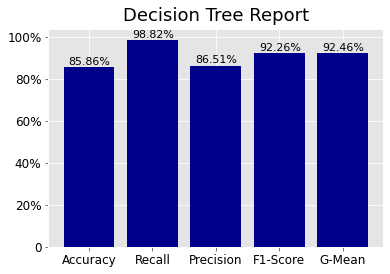

In [30]:
# Visualization classification report
import matplotlib.pyplot as plt
dt_report_bar = [dt_report_df.loc["accuracy","f1-score"],
                dt_report_df.loc["NonFraud","recall"],
                dt_report_df.loc["NonFraud","precision"],
                dt_report_df.loc["NonFraud","f1-score"],
                dt_gmean]
dt_report_bar = [num*100 for num in dt_report_bar]
dt_report_bar = [round(num, 2) for num in dt_report_bar]
plt.bar(x=["Accuracy","Recall","Precision","F1-Score","G-Mean"],height=dt_report_bar,color="darkblue")
plt.title("Decision Tree Report",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(dt_report_bar):
    plt.text(index-0.32, value+1, str(value)+"%", fontsize=11)
plt.show()

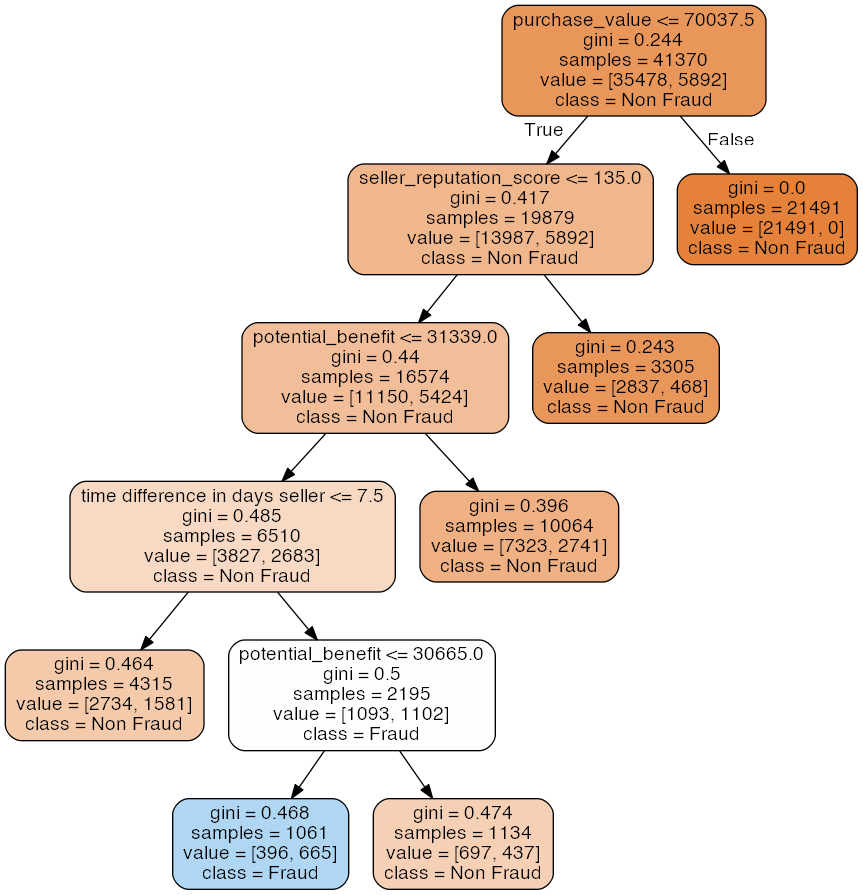

In [31]:
# Visualization decision tree
import pydotplus
import collections
from sklearn import tree
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

data_feature_names = ['seller_reputation_score',
                      'purchase_value',
                      'potential_benefit',
                      'device_type_Android',
                      'device_type_iOS',
                      'payment_method_Credit Payment',
                      'payment_method_Internet Banking/M-Banking',
                      'payment_method_Offline Store',
                      'payment_method_Uang Elektronik',
                      'payment_method_Virtual Account Bank',
                      'signup_day_buyer',
                      'signup_month_buyer',
                      'signup_year_buyer',
                      'signup_hour_buyer',
                      'signup_minutes_buyer',
                      'signup_day_seller',
                      'signup_month_seller',
                      'signup_year_seller',
                      'signup_hour_seller',
                      'signup_minutes_seller',
                      'purchase_year',
                      'purchase_day',
                      'purchase_month',
                      'purchase_hour',
                      'purchase_minutes',
                      'time difference in days buyer',
                      'time difference in days seller']

dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                class_names=['Non Fraud','Fraud'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('decision tree.png')

from IPython.display import Image
Image(filename = 'decision tree.png')

## Random Forest Model

In [32]:
# Check the effect of variables in determining class
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=50).fit(x_train,y_train)

importances = pd.DataFrame({'feature (random forest)':x_train.columns,'importance':np.round(rf.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)
importances.index = [x for x in range(1, len(importances.values)+1)]
importances

feature (random forest)  importance
1                             purchase_minute     0.09816
2                              purchase_value     0.09774
3                         signup_minute_buyer     0.09772
4                        signup_minute_seller     0.09131
5              time difference in days seller     0.08684
6                     seller_reputation_score     0.07469
7                           signup_hour_buyer     0.05723
8                          signup_hour_seller     0.05564
9                               purchase_hour     0.05237
10                          signup_day_seller     0.04296
11                           signup_day_buyer     0.03942
12                          potential_benefit     0.03941
13                               purchase_day     0.03724
14                         signup_year_seller     0.02983
15                        signup_month_seller     0.02749
16                         signup_month_buyer     0.02521
17                             purchase_month     0.02454
18              time difference in days buyer     0.01410
19             payment_method_Uang Elektronik     0.00373
20  payment_method_Internet Banking/M-Banking     0.00169
21                          signup_year_buyer     0.00129
22        payment_method_Virtual Account Bank     0.00080
23              payment_method_Credit Payment     0.00032
24               payment_method_Offline Store     0.00026
25                        device_type_Android     0.00001
26                            device_type_iOS     0.00000
27                              purchase_year     0.00000

In [33]:
# Selected model
rf = RandomForestClassifier(random_state=50).fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.8860688099266779


In [34]:
# Prediction for x test
y_rf_pred = rf.predict(x_test)
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Confusion matrix and accuracy
from sklearn.metrics import classification_report,confusion_matrix
conf_matrix_rf = confusion_matrix(y_test,y_rf_pred)
conf_matrix_rf

array([[14421,   690],
       [ 1330,  1289]], dtype=int64)

In [36]:
# Classification report
rf_report = classification_report(y_test,y_rf_pred,target_names=["NonFraud", "Fraud"],output_dict=True)
rf_report["accuracy"] = {"f1-score":0.8860688099266779,"support":17730}
rf_report_df = pd.DataFrame(rf_report).T
rf_report_df

precision    recall  f1-score  support
NonFraud       0.915561  0.954338  0.934547  15111.0
Fraud          0.651339  0.492173  0.560679   2619.0
accuracy            NaN       NaN  0.886069  17730.0
macro avg      0.783450  0.723255  0.747613  17730.0
weighted avg   0.876531  0.886069  0.879321  17730.0

In [37]:
# G-mean
from math import sqrt
rf_gmean = sqrt(rf_report_df.loc["NonFraud","precision"]*rf_report_df.loc["NonFraud","recall"])
rf_gmean

0.934748352344956

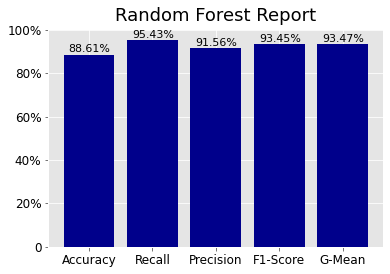

In [38]:
# Visualization classification report
import matplotlib.pyplot as plt
rf_report_bar = [rf_report_df.loc["accuracy","f1-score"],
                rf_report_df.loc["NonFraud","recall"],
                rf_report_df.loc["NonFraud","precision"],
                rf_report_df.loc["NonFraud","f1-score"],
                rf_gmean]
rf_report_bar = [num*100 for num in rf_report_bar]
rf_report_bar = [round(num, 2) for num in rf_report_bar]
plt.bar(x=["Accuracy","Recall","Precision","F1-Score","G-Mean"],height=rf_report_bar,color="darkblue")
plt.title("Random Forest Report",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(rf_report_bar):
    plt.text(index-0.32, value+1, str(value)+"%", fontsize=11)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.124549 to fit



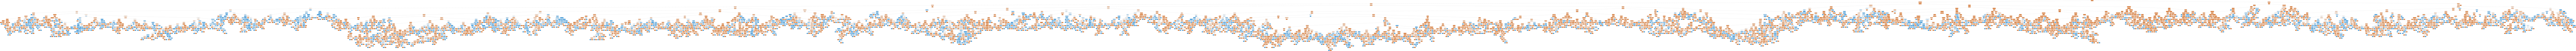

In [39]:
# Visualization one tree from random forest
import pydotplus
import collections
from sklearn import tree
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

random_forest = rf.estimators_[1]

data_feature_names = ['seller_reputation_score',
                      'purchase_value',
                      'potential_benefit',
                      'device_type_Android',
                      'device_type_iOS',
                      'payment_method_Credit Payment',
                      'payment_method_Internet Banking/M-Banking',
                      'payment_method_Offline Store',
                      'payment_method_Uang Elektronik',
                      'payment_method_Virtual Account Bank',
                      'signup_day_buyer',
                      'signup_month_buyer',
                      'signup_year_buyer',
                      'signup_hour_buyer',
                      'signup_minutes_buyer',
                      'signup_day_seller',
                      'signup_month_seller',
                      'signup_year_seller',
                      'signup_hour_seller',
                      'signup_minutes_seller',
                      'purchase_year',
                      'purchase_day',
                      'purchase_month',
                      'purchase_hour',
                      'purchase_minutes',
                      'time difference in days buyer',
                      'time difference in days seller']

dot_data = tree.export_graphviz(random_forest,
                                feature_names=data_feature_names,
                                class_names=['Non Fraud','Fraud'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('random forest.png')


from IPython.display import Image
Image(filename = 'random forest.png')

## Logistic Regression Model

In [40]:
# Check the effect of variables in determining class
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=50).fit(x_train,y_train)

importances = pd.DataFrame({'feature (logistic regression)':x_train.columns,'importance':np.round(lr.coef_[0],5)})
importances = importances.sort_values('importance',ascending=False)
importances.index = [x for x in range(1, len(importances.values)+1)]
importances

feature (logistic regression)  importance
1                           signup_year_buyer     0.00145
2                          signup_year_seller     0.00144
3                               purchase_year     0.00144
4                                purchase_day     0.00049
5                            signup_day_buyer     0.00049
6                             purchase_minute     0.00031
7                           potential_benefit     0.00026
8                        signup_minute_seller     0.00022
9                           signup_day_seller     0.00016
10                        signup_month_seller     0.00010
11                         signup_month_buyer     0.00009
12                             purchase_month     0.00006
13        payment_method_Virtual Account Bank     0.00001
14             payment_method_Uang Elektronik     0.00001
15               payment_method_Offline Store    -0.00000
16              payment_method_Credit Payment    -0.00000
17                            device_type_iOS    -0.00000
18                        device_type_Android     0.00000
19  payment_method_Internet Banking/M-Banking    -0.00001
20                    seller_reputation_score    -0.00002
21                         signup_hour_seller    -0.00008
22                        signup_minute_buyer    -0.00019
23                             purchase_value    -0.00024
24                              purchase_hour    -0.00054
25             time difference in days seller    -0.00062
26                          signup_hour_buyer    -0.00080
27              time difference in days buyer    -0.00211

In [41]:
# Selected model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=50).fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.6972927241962775


In [42]:
# Prediction for x test
y_lr_pred = lr.predict(x_test)
y_lr_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
# Confusion matrix and accuracy
from sklearn.metrics import classification_report,confusion_matrix
conf_matrix_lr = confusion_matrix(y_test,y_lr_pred)
conf_matrix_lr

array([[9886, 5225],
       [ 142, 2477]], dtype=int64)

In [44]:
# Classification report
lr_report = classification_report(y_test,y_lr_pred,target_names=["NonFraud", "Fraud"],output_dict=True)
lr_report["accuracy"] = {"f1-score":0.6972927241962775,"support":17730}
lr_report_df = pd.DataFrame(lr_report).T
lr_report_df

precision    recall  f1-score  support
NonFraud       0.985840  0.654225  0.786507  15111.0
Fraud          0.321605  0.945781  0.479992   2619.0
accuracy            NaN       NaN  0.697293  17730.0
macro avg      0.653722  0.800003  0.633250  17730.0
weighted avg   0.887722  0.697293  0.741230  17730.0

In [45]:
# G-mean
from math import sqrt
lr_gmean = sqrt(lr_report_df.loc["NonFraud","precision"]*lr_report_df.loc["NonFraud","recall"])
lr_gmean

0.8030948495825446

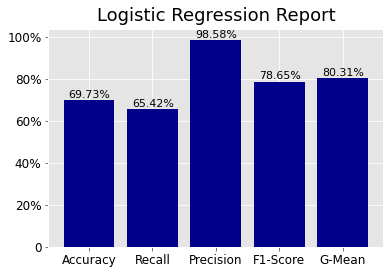

In [46]:
# Visualization classification report
import matplotlib.pyplot as plt
lr_report_bar = [lr_report_df.loc["accuracy","f1-score"],
                lr_report_df.loc["NonFraud","recall"],
                lr_report_df.loc["NonFraud","precision"],
                lr_report_df.loc["NonFraud","f1-score"],
                lr_gmean]
lr_report_bar = [num*100 for num in lr_report_bar]
lr_report_bar = [round(num, 2) for num in lr_report_bar]
plt.bar(x=["Accuracy","Recall","Precision","F1-Score","G-Mean"],height=lr_report_bar,color="darkblue")
plt.title("Logistic Regression Report",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(lr_report_bar):
    plt.text(index-0.32, value+1, str(value)+"%", fontsize=11)
plt.show()

## Model Comparision

### Accuracy

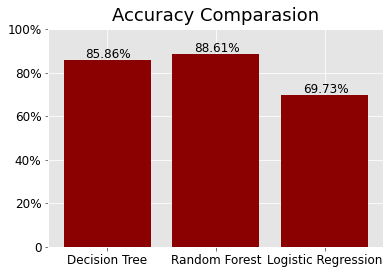

In [47]:
# Visualization bar chart
import matplotlib.pyplot as plt
accuracy_compare = [dt_report_df.loc["accuracy","f1-score"],
                   rf_report_df.loc["accuracy","f1-score"],
                   lr_report_df.loc["accuracy","f1-score"]]
accuracy_compare = [num*100 for num in accuracy_compare]
accuracy_compare = [round(num, 2) for num in accuracy_compare]
plt.bar(x=["Decision Tree","Random Forest","Logistic Regression"],height=accuracy_compare,color="darkred")
plt.title("Accuracy Comparasion",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(accuracy_compare):
    plt.text(index-0.2, value+1, str(value)+"%", fontsize=12)
plt.show()

### Recall

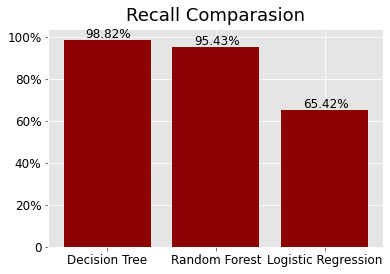

In [48]:
# Visualization bar chart
import matplotlib.pyplot as plt
recall_compare = [dt_report_df.loc["NonFraud","recall"],
                   rf_report_df.loc["NonFraud","recall"],
                   lr_report_df.loc["NonFraud","recall"]]
recall_compare = [num*100 for num in recall_compare]
recall_compare = [round(num, 2) for num in recall_compare]
plt.bar(x=["Decision Tree","Random Forest","Logistic Regression"],height=recall_compare,color="darkred")
plt.title("Recall Comparasion",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(recall_compare):
    plt.text(index-0.2, value+1, str(value)+"%", fontsize=12)
plt.show()

### Precision

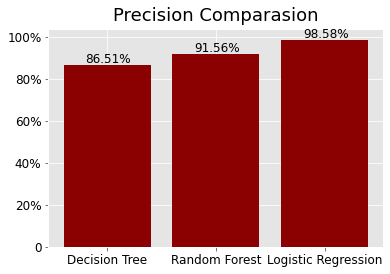

In [49]:
# Visualization bar chart
import matplotlib.pyplot as plt
precision_compare = [dt_report_df.loc["NonFraud","precision"],
                     rf_report_df.loc["NonFraud","precision"],
                     lr_report_df.loc["NonFraud","precision"]]
precision_compare = [num*100 for num in precision_compare]
precision_compare = [round(num, 2) for num in precision_compare]
plt.bar(x=["Decision Tree","Random Forest","Logistic Regression"],height=precision_compare,color="darkred")
plt.title("Precision Comparasion",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(precision_compare):
    plt.text(index-0.2, value+1, str(value)+"%", fontsize=12)
plt.show()

### F1-Score

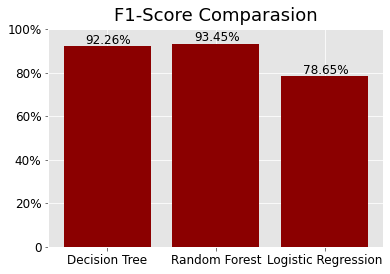

In [50]:
# Visualization bar chart
import matplotlib.pyplot as plt
f1score_compare = [dt_report_df.loc["NonFraud","f1-score"],
                  rf_report_df.loc["NonFraud","f1-score"],
                  lr_report_df.loc["NonFraud","f1-score"]]
f1score_compare = [num*100 for num in f1score_compare]
f1score_compare = [round(num, 2) for num in f1score_compare]
plt.bar(x=["Decision Tree","Random Forest","Logistic Regression"],height=f1score_compare,color="darkred")
plt.title("F1-Score Comparasion",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(f1score_compare):
    plt.text(index-0.2, value+1, str(value)+"%", fontsize=12)
plt.show()

### G-Mean

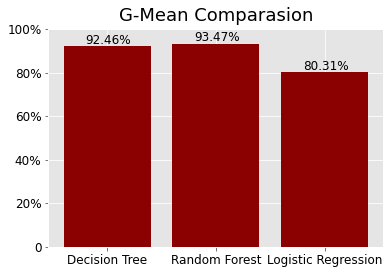

In [51]:
# Visualization bar chart
import matplotlib.pyplot as plt
gmean_compare = [dt_gmean,
                rf_gmean,
                lr_gmean]
gmean_compare = [num*100 for num in gmean_compare]
gmean_compare = [round(num, 2) for num in gmean_compare]
plt.bar(x=["Decision Tree","Random Forest","Logistic Regression"],height=gmean_compare,color="darkred")
plt.title("G-Mean Comparasion",fontsize=18,color="black",y=1.01)
plt.yticks([0,20,40,60,80,100],["0","20%","40%","60%","80%","100%"],fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
for index, value in enumerate(gmean_compare):
    plt.text(index-0.2, value+1, str(value)+"%", fontsize=12)
plt.show()